# Analisi dell'ecosistema delle StartUp Italia 2020 - 2024


#### Setup e Import


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
print("ANALISI STARTUP 2020-2024")
print("=" * 60)
print("📊 Ecosystem startup italiano - Registro Imprese")
print("📅 Periodo: 2020-2024")
print("=" * 60)

ANALISI STARTUP 2020-2024
📊 Ecosystem startup italiano - Registro Imprese
📅 Periodo: 2020-2024



#### Definizione Leggende


In [2]:
print("ANALISI STARTUP 2020-2024")
print("=" * 60)

# Definisco le legendas basate sul file Excel - startup.xls di registro imprese
LEGENDA_PRODUZIONE = {
    'A': '0-100k €',
    'B': '100k-500k €',
    'C': '500k-1M €',
    'D': '1M-2M €',
    'E': '2M-5M €',
    'F': '5M-10M €',
    'G': '10M-50M €',
    'H': '50M+ €'
}

LEGENDA_ADDETTI = {
    'A': '0-4 addetti',
    'B': '5-9 addetti',
    'C': '10-19 addetti',
    'D': '20-49 addetti',
    'E': '50-249 addetti',
    'F': '250+ addetti'
}

LEGENDA_CAPITALE = {
    '1': '1 €',
    '2': '1-5k €',
    '3': '5-10k €',
    '4': '10-50k €',
    '5': '50-100k €',
    '6': '100-250k €',
    '7': '250-500k €',
    '8': '500k-1M €',
    '9': '1-2.5M €',
    '10': '2.5-5M €',
    '11': '5M+ €'
}

REQUISITI_STARTUP = {
    '1': '15% costi per R&D',
    '2': '2/3 team con laurea magistrale o 1/3 con dottorato',
    '3': 'Brevetti/software registrato'
}

LEGENDA_PREVALENZA = {
    'NO' : '[% del capitale sociale + % Amministratori] / 2 ≤ 50%',
    'Maggioritaria' : '[% del capitale sociale + % Amministratori] / 2 > 50%',
    'Forte' : '[% del capitale sociale + % Amministratori] / 2 > 66%',
    'Esclusiva' : '[% del capitale sociale + % Amministratori] / 2 = 100%'
}

print("\n (1) Legenda classe di produzione :", display(LEGENDA_PRODUZIONE))
print("\n (2) Legenda classe di addetti:", display(LEGENDA_ADDETTI))
print("\n (3) Legenda classe di capitale:", display(LEGENDA_CAPITALE))
print("\n (4) Nota su requisiti per startup:", display(REQUISITI_STARTUP))
print("\n (5) Legenda prevalenza femminile/giovanile/straniera:", display(LEGENDA_PREVALENZA))

ANALISI STARTUP 2020-2024


{'A': '0-100k €',
 'B': '100k-500k €',
 'C': '500k-1M €',
 'D': '1M-2M €',
 'E': '2M-5M €',
 'F': '5M-10M €',
 'G': '10M-50M €',
 'H': '50M+ €'}


 (1) Legenda classe di produzione : None


{'A': '0-4 addetti',
 'B': '5-9 addetti',
 'C': '10-19 addetti',
 'D': '20-49 addetti',
 'E': '50-249 addetti',
 'F': '250+ addetti'}


 (2) Legenda classe di addetti: None


{'1': '1 €',
 '2': '1-5k €',
 '3': '5-10k €',
 '4': '10-50k €',
 '5': '50-100k €',
 '6': '100-250k €',
 '7': '250-500k €',
 '8': '500k-1M €',
 '9': '1-2.5M €',
 '10': '2.5-5M €',
 '11': '5M+ €'}


 (3) Legenda classe di capitale: None


{'1': '15% costi per R&D',
 '2': '2/3 team con laurea magistrale o 1/3 con dottorato',
 '3': 'Brevetti/software registrato'}


 (4) Nota su requisiti per startup: None


{'NO': '[% del capitale sociale + % Amministratori] / 2 ≤ 50%',
 'Maggioritaria': '[% del capitale sociale + % Amministratori] / 2 > 50%',
 'Forte': '[% del capitale sociale + % Amministratori] / 2 > 66%',
 'Esclusiva': '[% del capitale sociale + % Amministratori] / 2 = 100%'}


 (5) Legenda prevalenza femminile/giovanile/straniera: None


#### ===============================
####  Caricamento Dataset
####  ===============================

In [3]:
def load_and_analyze_data():
    """Carica e analizza il dataset con gestione missing values"""
    
    # Carica dataset
    try:
        df = pd.read_csv('clean_dataset.csv', sep=';', 
                        keep_default_na=False,  # Disabilita interpretazione automatica
                        na_values=['', 'N/A', 'nan', 'NaN', 'null', 'None', '#N/A'])  # NA rimosso!
       # Verifica che Napoli sia stata preservata
        napoli_count = (df['pv'] == 'NA').sum()
        print(f"Startup di Napoli preservate: {napoli_count}")
    except Exception as e:
        print("❌ Errore nel caricamento file csv:", e)
        return None
    
    print(f"Dataset iniziale: {len(df):,} startup")
        
    return df
    
df = load_and_analyze_data()

if df is not None:
    print(f"✅ Dataset finale: {len(df):,} startup")
    print(f" Dimensioni: {df.shape}")
    print(f" Colonne: {df.shape[1]}")
    
    # Verifica distribuzione province
    print(f"\n Province più rappresentate:")
    top_provinces = df['pv'].value_counts().head(10)
    for prov, count in top_provinces.items():
        print(f"  {prov}: {count:,} startup")
    
    # Mostra prime righe e info
    display(df.head())
    print("\n INFO DATASET:")
    df.info()
else:
    print("Dataset non caricato correttamente.")


Startup di Napoli preservate: 846
Dataset iniziale: 12,292 startup
✅ Dataset finale: 12,292 startup
 Dimensioni: (12292, 30)
 Colonne: 30

 Province più rappresentate:
  MI: 2,484 startup
  RM: 1,248 startup
  NA: 846 startup
  TO: 503 startup
  BA: 291 startup
  BO: 289 startup
  SA: 244 startup
  BS: 228 startup
  CE: 225 startup
  PA: 224 startup


,denominazione,nat.giuridica,codice fiscale,pv,comune,data iscrizione alla sezione delle startup,data iscrizione al Registro Imprese,data inizio dell'esercizio effettivo dell'attività,ateco 2007,settore,...,forza lavoro con titoli,possesso di brevetti,data dichiarazione,prevalenza femminile,prevalenza giovanile,prevalenza straniera,nome,status,tipo_societa,Year
0,plw 1 societa' agricola s.r.l.,SOCIETA' A RESPONSABILITA' LIMITATA,4651010169,BG,BERGAMO,25/01/2023,25/01/2023,12/01/2023,72102,SERVIZI,...,SI,no data,21/03/2025 00:00:00,no data,NO,NO,Plw 1,attiva,societa agricola,2023
1,gate 42 s.r.l. ...,SOCIETA' A RESPONSABILITA' LIMITATA,8666251213,NA,TORRE DEL GRECO,11/07/2017,31/05/2017,12/04/2017,621000,SERVIZI,...,no data,no data,28/08/2019 00:00:00,NO,NO,NO,Gate 42,attiva,startup costituita a norma dell art 4 comma 10...,2017
2,block-data 52 - societa' a responsabilita' lim...,SOCIETA' A RESPONSABILITA' LIMITATA,1218300570,RM,ROMA,23/12/2020,02/02/2024,18/12/2020,621000,SERVIZI,...,no data,SI,18/07/2024 00:00:00,NO,NO,NO,Block-Data 52,attiva,startup,2020
3,e-solutions 78 - societa' a responsabilita' li...,SOCIETA' A RESPONSABILITA' LIMITATA,1218120572,RM,ROMA,10/02/2022,31/03/2025,10/01/2021,NC,NaN,...,SI,no data,31/03/2025 00:00:00,NO,NO,NO,E-Solutions 78,attiva,startup,2022
4,before 1783 s.b.s.r.l.,SOCIETA' A RESPONSABILITA' LIMITATA,3255140802,RC,TERRANOVA SAPPO MINULIO,22/06/2023,22/06/2023,08/06/2023,621000,SERVIZI,...,no data,no data,22/06/2023 00:00:00,Forte,NO,NO,Before 1783,attiva,societa benefit,2023



 INFO DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12292 entries, 0 to 12291
Data columns (total 30 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   denominazione                                       12292 non-null  object 
 1   nat.giuridica                                       12292 non-null  object 
 2   codice fiscale                                      12292 non-null  int64  
 3   pv                                                  12292 non-null  object 
 4   comune                                              12292 non-null  object 
 5   data iscrizione alla sezione delle startup          12292 non-null  object 
 6   data iscrizione al Registro Imprese                 12292 non-null  object 
 7   data inizio dell'esercizio effettivo dell'attività  12219 non-null  object 
 8   ateco 2007                                          12292 no


####   Pulizia Nomi Colonne


In [4]:
def clean_column_names(df):
    """Pulisce e rinomina le colonne in modo leggibile"""
    df_clean = df.copy()
    
    # Mappa per rinominare le colonne
    column_mapping = {
        'denominazione': 'ragione_sociale',
        'nat.giuridica': 'natura_giuridica',
        'tipo_societa': 'tipo startup',
        'pv': 'provincia',
        'comune': 'comune',
        'data iscrizione alla sezione delle startup': 'data_iscrizione_startup',
        'data iscrizione al Registro Imprese': 'data_iscrizione_ri',
        'data inizio dell\'esercizio effettivo dell\'attività': 'data_inizio_attivita',
        'ateco 2007': 'codice_ateco',
        'settore': 'settore',
        'attività': 'descrizione_attivita',
        'classe di produzione ultimo anno (1)': 'classe_produzione',
        'classe di addetti ultimo anno (2)': 'classe_addetti',
        'impresa a vocazione sociale (5)': 'vocazione_sociale',
        'impresa ad alto valore tecnologico in ambito energetico(4)': 'alta_tecnologia_energia',
        'classe di capitale (3)': 'classe_capitale',
        'sito internet': 'sito_web',
        '1° req. (6)': 'requisito_1',
        '2° req. (6)': 'requisito_2',
        '3° req. (6)': 'requisito_3',
        'data dichiarazione (7)': 'data_dichiarazione',
        'prevalenza femminile (8)': 'prevalenza_femminile',
        'prevalenza giovanile (8)': 'prevalenza_giovanile',
        'prevalenza straniera (8)': 'prevalenza_straniera'
    }
    
    # Applica mapping solo se colonne esistono
    existing_mapping = {k: v for k, v in column_mapping.items() if k in df_clean.columns}
    df_clean.rename(columns=existing_mapping, inplace=True)
    
    # Pulizia generale nomi colonne
    df_clean.columns = (df_clean.columns.str.strip().str.lower()
                       .str.replace(' ', '_').str.replace('[^a-zA-Z0-9_]', '', regex=True))
    
    return df_clean

# Applica pulizia nomi
df_clean = clean_column_names(df)

print("PULIZIA NOMI COLONNE")
print("-" * 30)
print("Colonne rinominate:")
for old, new in zip(df.columns, df_clean.columns):
    if old != new:
        print(f"  '{old}' → '{new}'")

print(f"\n✅ Colonne finali: {list(df_clean.columns)}")

PULIZIA NOMI COLONNE
------------------------------
Colonne rinominate:
  'denominazione' → 'ragione_sociale'
  'nat.giuridica' → 'natura_giuridica'
  'codice fiscale ' → 'codice_fiscale'
  'pv' → 'provincia'
  'data iscrizione alla sezione delle startup' → 'data_iscrizione_startup'
  'data iscrizione al Registro Imprese' → 'data_iscrizione_ri'
  'data inizio dell'esercizio effettivo dell'attività' → 'data_inizio_attivita'
  'ateco 2007' → 'codice_ateco'
  'attività' → 'descrizione_attivita'
  'sito internet' → 'sito_web'
  'sezione attività' → 'sezione_attivit'
  'classe addetti' → 'classe_addetti'
  'classe val.prod.' → 'classe_valprod'
  'alto valore tecnologico' → 'alto_valore_tecnologico'
  'vocazione sociale' → 'vocazione_sociale'
  'classe cap.sociale' → 'classe_capsociale'
  'spese in ricerca e sviluppo' → 'spese_in_ricerca_e_sviluppo'
  'forza lavoro con titoli ' → 'forza_lavoro_con_titoli'
  'possesso di brevetti ' → 'possesso_di_brevetti'
  'data dichiarazione' → 'data_dichi

In [5]:
# Verifica che Napoli sia ancora presente dopo cleaning, perche inizialmente non mi dava 
if 'provincia' in df_clean.columns:
    napoli_after_clean = (df_clean['provincia'] == 'NA').sum()
    print(f" Napoli dopo pulizia: {napoli_after_clean} (dovrebbe essere uguale a prima)")

 Napoli dopo pulizia: 846 (dovrebbe essere uguale a prima)



#### Pulizia Dati Base


In [6]:
def clean_basic_data(df):
    """Pulisce i dati base prima dell'arricchimento"""
    df_clean = df.copy()
    
    print("PULIZIA DATI BASE:")
    print("-" * 25)
    
    # Pulizia stringhe per classi
    string_cols = ['classe_produzione', 'classe_addetti']
    for col in string_cols:
        if col in df_clean.columns:
            df_clean[col] = df_clean[col].astype(str).str.strip().replace('nan', np.nan)
            print(f"✅ {col}: pulita")
    
    # Pulizia classe capitale (mantiene formato originale)
    if 'classe_capitale' in df_clean.columns:
        df_clean['classe_capitale'] = df_clean['classe_capitale'].astype(str).str.strip()
        df_clean['classe_capitale'] = df_clean['classe_capitale'].replace(['', 'nan', 'None'], np.nan)
        
        # Rimuovi .0 da numeri 
        def clean_capital_value(val):
            if pd.isna(val) or val == 'nan':
                return np.nan
            try:
                if '.' in str(val) and str(val).endswith('.0'):
                    return str(int(float(val)))
                return str(val)
            except:
                return np.nan
        
        df_clean['classe_capitale'] = df_clean['classe_capitale'].apply(clean_capital_value)
        print("✅ classe_capitale: pulita e mantenuto formato originale")
    
    # Pulizia requisiti
    req_cols = ['requisito_1', 'requisito_2', 'requisito_3']
    for col in req_cols:
        if col in df_clean.columns:
            df_clean[col] = df_clean[col].astype(str).str.strip().str.upper().replace('NAN', np.nan)
            print(f"✅ {col}: normalizzato")
    
    # Pulizia date
    date_cols = ['data_iscrizione_startup']
    for col in date_cols:
        if col in df_clean.columns:
            df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce', dayfirst=True)
            print(f"✅ {col}: convertita in datetime")
    
    return df_clean

# Applica pulizia base
df_clean = clean_basic_data(df_clean)
print("\n✅ Pulizia dati base completata")


PULIZIA DATI BASE:
-------------------------
✅ classe_addetti: pulita
✅ data_iscrizione_startup: convertita in datetime

✅ Pulizia dati base completata



#### Arricchimento con Leggende


In [7]:
def enrich_with_legends(df):
    """Arricchisce il dataset con le descrizioni delle leggende"""
    df_enriched = df.copy()
    
    print("🚀 ARRICCHIMENTO CON LEGGENDE:")
    print("-" * 35)
    
    # 1. Arricchimento PRODUZIONE
    if 'classe_produzione' in df_enriched.columns:
        df_enriched['produzione_descrizione'] = df_enriched['classe_produzione'].map(LEGENDA_PRODUZIONE)
        valid_prod = df_enriched['produzione_descrizione'].notna().sum()
        print(f"✅ Produzione: {valid_prod:,}/{len(df_enriched):,} mappate")
        
        # Categoria produzione
        def categorize_production(classe):
            if pd.isna(classe) or classe == 'nan':
                return 'Dati non disponibili'
            elif classe in ['A', 'B']:
                return 'Micro (0-500k)'
            elif classe in ['C', 'D']:
                return 'Piccola (500k-2M)'
            elif classe in ['E', 'F']:
                return 'Media (2M-10M)'
            elif classe in ['G', 'H']:
                return 'Grande (10M+)'
            else:
                return 'Non classificata'
        
        df_enriched['produzione_categoria'] = df_enriched['classe_produzione'].apply(categorize_production)
    
    # 2. Arricchimento ADDETTI
    if 'classe_addetti' in df_enriched.columns:
        df_enriched['addetti_descrizione'] = df_enriched['classe_addetti'].map(LEGENDA_ADDETTI)
        valid_add = df_enriched['addetti_descrizione'].notna().sum()
        print(f"✅ Addetti: {valid_add:,}/{len(df_enriched):,} mappate")
        
        # Categoria addetti
        def categorize_employees(classe):
            if pd.isna(classe) or classe == 'nan':
                return 'Dati non disponibili'
            elif classe in ['A', 'B']:
                return 'Micro (0-9)'
            elif classe in ['C', 'D']:
                return 'Piccola (10-49)'
            elif classe == 'E':
                return 'Media (50-249)'
            elif classe == 'F':
                return 'Grande (250+)'
            else:
                return 'Non classificata'
        
        df_enriched['addetti_categoria'] = df_enriched['classe_addetti'].apply(categorize_employees)
    
    # 3. Arricchimento CAPITALE
    if 'classe_capitale' in df_enriched.columns:
        df_enriched['capitale_descrizione'] = df_enriched['classe_capitale'].map(LEGENDA_CAPITALE)
        valid_cap = df_enriched['capitale_descrizione'].notna().sum()
        print(f"✅ Capitale: {valid_cap:,}/{len(df_enriched):,} mappate")
        
        # Categoria capitale
        def categorize_capital(classe):
            if pd.isna(classe) or classe == 'nan' or classe == '':
                return 'Dati non disponibili'
            try:
                classe_int = int(classe)
                if classe_int <= 3:
                    return 'Capitale minimo (≤10k)'
                elif classe_int <= 6:
                    return 'Capitale basso (10k-250k)'
                elif classe_int <= 9:
                    return 'Capitale medio (250k-2.5M)'
                else:
                    return 'Capitale alto (>2.5M)'
            except:
                return 'Non classificato'
        
        df_enriched['capitale_categoria'] = df_enriched['classe_capitale'].apply(categorize_capital)
    
    # 4. Calcolo età aziendale
    if 'data_iscrizione_startup' in df_enriched.columns:
        df_enriched['data_iscrizione_startup'] = pd.to_datetime(df_enriched['data_iscrizione_startup'], errors='coerce')
        df_enriched['company_age_years'] = (pd.Timestamp.now() - df_enriched['data_iscrizione_startup']).dt.days / 365.25
        df_enriched['company_age_years'] = df_enriched['company_age_years'].round(1)
        valid_age = df_enriched['company_age_years'].notna().sum()
        print(f"✅ Età calcolata: {valid_age:,}/{len(df_enriched):,}")
    
    # 5. Caratteristiche innovative
    if 'alta_tecnologia_energia' in df_enriched.columns:
        df_enriched['is_tech_energy'] = (df_enriched['alta_tecnologia_energia'] == 'SI')
    if 'vocazione_sociale' in df_enriched.columns:
        df_enriched['is_social_impact'] = (df_enriched['vocazione_sociale'] == 'SI')
    
    df_enriched['has_website'] = (df_enriched['sito_web'].notna() & 
                                 (df_enriched['sito_web'].str.strip() != ''))
    
    # 6. Requisiti innovazione
    req_cols = ['requisito_1', 'requisito_2', 'requisito_3']
    df_enriched['requisiti_soddisfatti'] = 0
    
    for col in req_cols:
        if col in df_enriched.columns:
            df_enriched['requisiti_soddisfatti'] += (df_enriched[col] == 'SI').astype(int)
    
    def classify_innovation(req_count):
        if req_count == 0:
            return 'Tradizionale'
        elif req_count == 1:
            return 'Innovativa base'
        elif req_count == 2:
            return 'Altamente innovativa'
        else:
            return 'Super innovativa'
    
    df_enriched['innovation_level'] = df_enriched['requisiti_soddisfatti'].apply(classify_innovation)
    
    print("Arricchimento completato!")
    return df_enriched

# Applica arricchimento
df_enriched = enrich_with_legends(df_clean)

🚀 ARRICCHIMENTO CON LEGGENDE:
-----------------------------------
✅ Addetti: 5,020/12,292 mappate
✅ Età calcolata: 12,292/12,292
Arricchimento completato!



#### Analisi Valori Mancanti (DOPO arricchimento)


In [8]:
print("\n📊 ANALISI VALORI MANCANTI")
print("=" * 40)

# Analizza missing values sulle colonne arricchite
critical_cols = {
    'classe_produzione': 'Produzione (base)',
    'produzione_descrizione': 'Produzione (descrizione)',
    'classe_addetti': 'Addetti (base)',
    'addetti_descrizione': 'Addetti (descrizione)',
    'classe_capitale': 'Capitale (base)',
    'capitale_descrizione': 'Capitale (descrizione)',
    'requisito_1': '1° Requisito',
    'requisito_2': '2° Requisito',
    'requisito_3': '3° Requisito',
    'vocazione_sociale': 'Vocazione Sociale',
    'sito_web': 'Sito Web'
}

missing_stats = []
for col, name in critical_cols.items():
    if col in df_enriched.columns:
        missing = df_enriched[col].isna().sum() + (df_enriched[col] == '').sum()
        percentage = (missing / len(df_enriched)) * 100
        missing_stats.append({
            'Colonna': name,
            'Valori_Mancanti': missing,
            'Percentuale': percentage
        })
        print(f"{name}: {missing:,}/{len(df_enriched):,} ({percentage:.1f}%)")

# DataFrame per visualizzazione
missing_df = pd.DataFrame(missing_stats).sort_values('Percentuale', ascending=False)
display(missing_df)


📊 ANALISI VALORI MANCANTI
Addetti (base): 0/12,292 (0.0%)
Addetti (descrizione): 7,272/12,292 (59.2%)
Vocazione Sociale: 0/12,292 (0.0%)
Sito Web: 2,219/12,292 (18.1%)


,Colonna,Valori_Mancanti,Percentuale
1,Addetti (descrizione),7272,59.160430
3,Sito Web,2219,18.052392
0,Addetti (base),0,0.000000
2,Vocazione Sociale,0,0.000000



#### Visualizzazione Missing Values


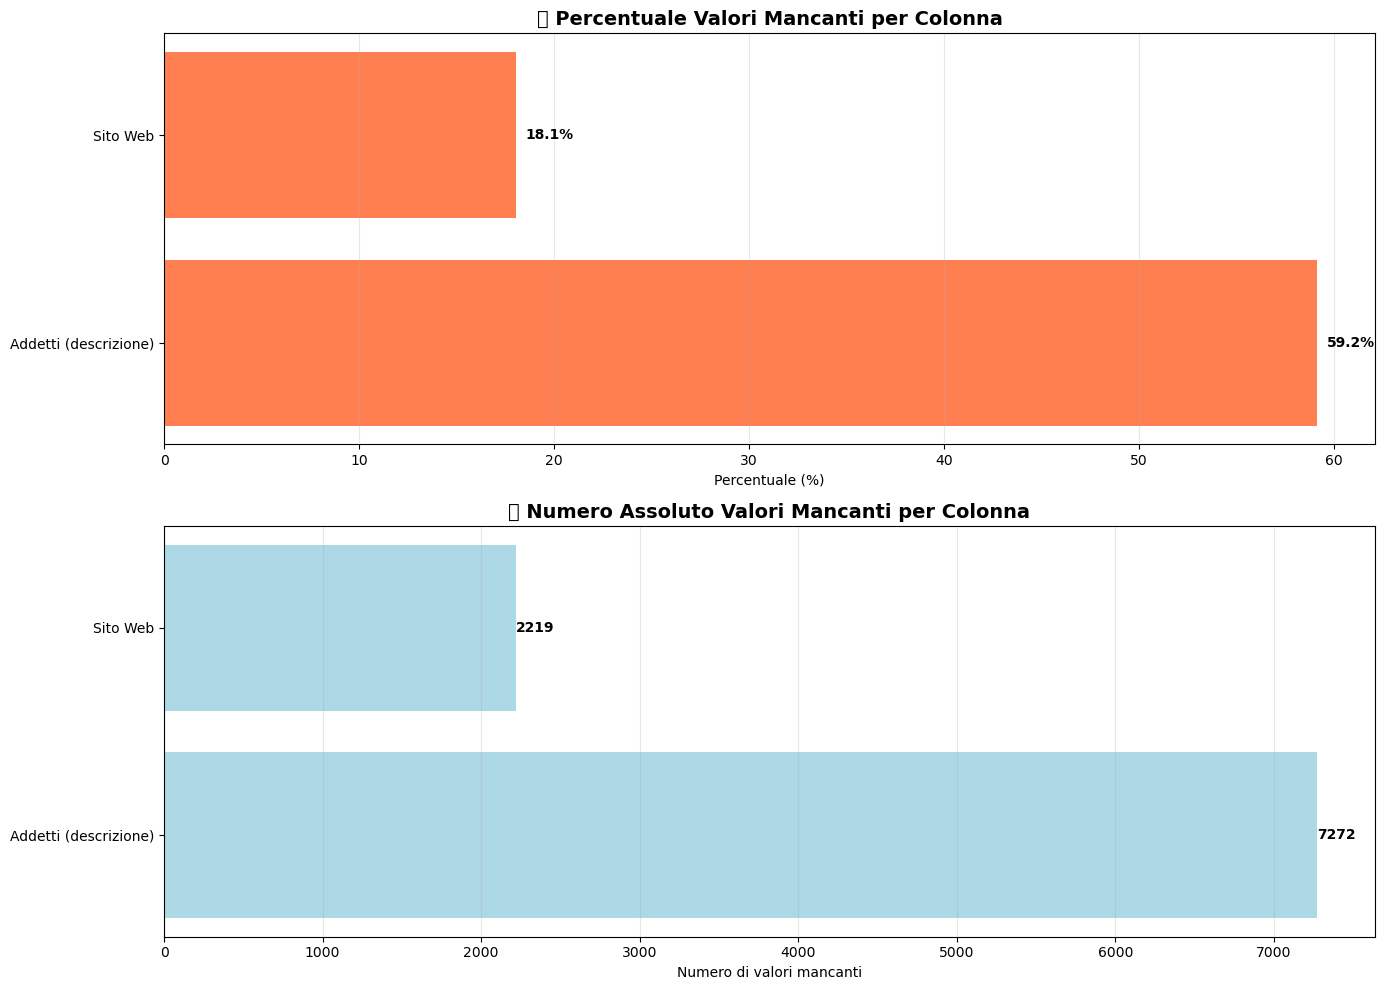

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

# Filtra solo colonne con missing values
missing_cols = missing_df[missing_df['Valori_Mancanti'] > 0]

if len(missing_cols) > 0:
    # Primo grafico: Percentuale
    plt.subplot(2, 1, 1)
    bars1 = plt.barh(missing_cols['Colonna'], missing_cols['Percentuale'], color='coral')
    plt.title('📊 Percentuale Valori Mancanti per Colonna', fontsize=14, fontweight='bold')
    plt.xlabel('Percentuale (%)')
    plt.grid(axis='x', alpha=0.3)

    # Aggiungi percentuali sopra le barre
    for bar in bars1:
        width = bar.get_width()
        plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
                 f'{width:.1f}%', va='center', fontsize=10, fontweight='bold', color='black')

    # Secondo grafico: Numero assoluto
    plt.subplot(2, 1, 2)
    bars2 = plt.barh(missing_cols['Colonna'], missing_cols['Valori_Mancanti'], color='lightblue')
    plt.title('📈 Numero Assoluto Valori Mancanti per Colonna', fontsize=14, fontweight='bold')
    plt.xlabel('Numero di valori mancanti')
    plt.grid(axis='x', alpha=0.3)

    # Aggiungi numeri sopra le barre
    for bar in bars2:
        width = bar.get_width()
        plt.text(width + 1, bar.get_y() + bar.get_height()/2,
                 f'{int(width)}', va='center', fontsize=10, fontweight='bold', color='black')

    plt.tight_layout()
    plt.show()
else:
    print(" Nessun valore mancante trovato!")



#### CELLA 9: Salvataggio Dataset Final


In [11]:
# Salva il dataset arricchito e pulito
output_file = 'startup_final_enriched.csv'
df_enriched.to_csv(output_file, index=False)

print(f"\nSALVATAGGIO COMPLETATO")
print(f"✅ Dataset arricchito salvato: '{output_file}'")
print(f" Righe: {len(df_enriched):,}")
print(f" Colonne: {len(df_enriched.columns)}")
print("\n DATASET PRONTO PER ANALISI BUSINESS!")


SALVATAGGIO COMPLETATO
✅ Dataset arricchito salvato: 'startup_final_enriched.csv'
 Righe: 12,292
 Colonne: 37

 DATASET PRONTO PER ANALISI BUSINESS!


=== ANALISI TEMPORALE ===
Colonne con date trovate: ['data_iscrizione_startup', 'data_iscrizione_ri', 'data_inizio_attivita', 'data_dichiarazione']
✅ Convertita colonna: data_iscrizione_startup
✅ Convertita colonna: data_iscrizione_ri
✅ Convertita colonna: data_inizio_attivita
✅ Convertita colonna: data_dichiarazione

📅 STARTUP PER ANNO DI ISCRIZIONE:
anno_iscrizione
2013       2
2014       9
2015      44
2016      58
2017     145
2018     256
2019     840
2020    1612
2021    2224
2022    1787
2023    2007
2024    2421
2025     887
Name: count, dtype: int64

=== ANALISI GEOGRAFICA ===

🏛️ TOP 20 PROVINCE:
provincia
MI    2484
RM    1248
TO     503
BA     291
BO     289
SA     244
BS     228
CE     225
PA     224
GE     215
BG     211
FI     193
PD     183
VR     174
MO     139
CT     138
TN     138
MB     132
VI     121
AV     121
Name: count, dtype: int64

🏘️ TOP 15 COMUNI:
comune
MILANO     2283
ROMA       1143
NAPOLI      580
TORINO      417
GENOVA      190
PALERMO     187
BOLOGNA 

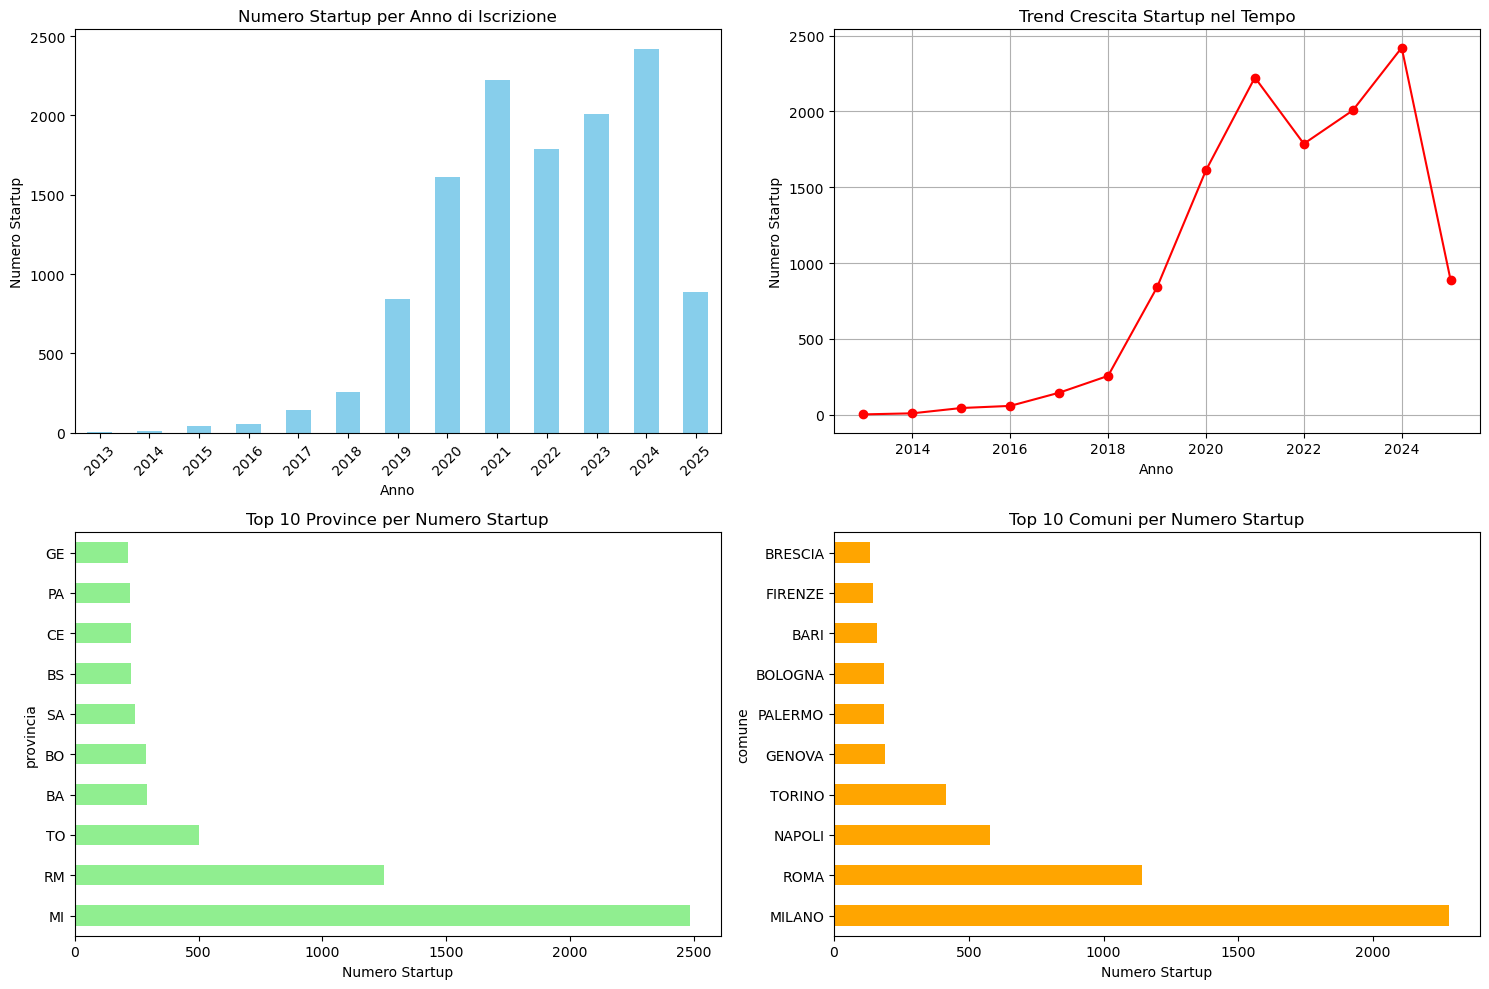


📊 STATISTICHE TEMPORALI DETTAGLIATE:
Anno più antico: 2013
Anno più recente: 2025
Periodo coperto: 12 anni
Media startup per anno: 945.5

📈 CRESCITA YEAR-OVER-YEAR (%):
anno_iscrizione
2014    350.0
2015    388.9
2016     31.8
2017    150.0
2018     76.6
2019    228.1
2020     91.9
2021     38.0
2022    -19.6
2023     12.3
2024     20.6
2025    -63.4
Name: count, dtype: float64


In [12]:
# Analisi Temporale e Geografica delle Startup

# Carica il dataset pulito
df = pd.read_csv('startup_final_enriched.csv')

print("=== ANALISI TEMPORALE ===")

# Conversione date (adatta i nomi delle colonne)
date_columns = [col for col in df.columns if 'data' in col]
print(f"Colonne con date trovate: {date_columns}")

for col in date_columns:
    if col in df.columns:
        try:
            df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)
            print(f"✅ Convertita colonna: {col}")
        except:
            print(f"❌ Errore conversione: {col}")

# Analisi per anno di iscrizione startup
if 'data_iscrizione_startup' in df.columns:
    df['anno_iscrizione'] = df['data_iscrizione_startup'].dt.year
    
    # Distribuzione per anno
    anni_startup = df['anno_iscrizione'].value_counts().sort_index()
    print(f"\n📅 STARTUP PER ANNO DI ISCRIZIONE:")
    print(anni_startup)
    
    # Grafico trend temporale
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 2, 1)
    anni_startup.plot(kind='bar', color='skyblue')
    plt.title('Numero Startup per Anno di Iscrizione')
    plt.xlabel('Anno')
    plt.ylabel('Numero Startup')
    plt.xticks(rotation=45)
    
    plt.subplot(2, 2, 2)
    anni_startup.plot(kind='line', marker='o', color='red')
    plt.title('Trend Crescita Startup nel Tempo')
    plt.xlabel('Anno')
    plt.ylabel('Numero Startup')
    plt.grid(True)

# Analisi geografica
print(f"\n=== ANALISI GEOGRAFICA ===")

# Distribuzione per provincia
if 'provincia' in df.columns:
    prov_counts = df['provincia'].value_counts().head(20)
    print(f"\n🏛️ TOP 20 PROVINCE:")
    print(prov_counts)
    
    plt.subplot(2, 2, 3)
    prov_counts.head(10).plot(kind='barh', color='lightgreen')
    plt.title('Top 10 Province per Numero Startup')
    plt.xlabel('Numero Startup')

# Distribuzione per comune
if 'comune' in df.columns:
    comuni_counts = df['comune'].value_counts().head(15)
    print(f"\n🏘️ TOP 15 COMUNI:")
    print(comuni_counts)
    
    plt.subplot(2, 2, 4)
    comuni_counts.head(10).plot(kind='barh', color='orange')
    plt.title('Top 10 Comuni per Numero Startup')
    plt.xlabel('Numero Startup')

plt.tight_layout()
plt.show()

# Statistiche temporali dettagliate
print(f"\n📊 STATISTICHE TEMPORALI DETTAGLIATE:")
if 'anno_iscrizione' in df.columns:
    print(f"Anno più antico: {df['anno_iscrizione'].min()}")
    print(f"Anno più recente: {df['anno_iscrizione'].max()}")
    print(f"Periodo coperto: {df['anno_iscrizione'].max() - df['anno_iscrizione'].min()} anni")
    print(f"Media startup per anno: {len(df) / (df['anno_iscrizione'].max() - df['anno_iscrizione'].min() + 1):.1f}")

# Crescita year-over-year
if len(anni_startup) > 1:
    growth_rates = anni_startup.pct_change() * 100
    print(f"\n📈 CRESCITA YEAR-OVER-YEAR (%):")
    print(growth_rates.dropna().round(1))

=== ANALISI SETTORIALE ===

🏭 DISTRIBUZIONE PER SETTORE:
settore
SERVIZI                  9053
INDUSTRIA/ARTIGIANATO    1330
COMMERCIO                 314
AGRICOLTURA/PESCA          73
TURISMO                    57
Name: count, dtype: int64

📋 TOP 15 MACRO-SETTORI ATECO:
macro_ateco
62    5034
72    1553
63     791
74     278
70     266
28     265
47     201
71     197
26     185
58     163
NC     160
73     125
32     114
82     101
85      99
Name: count, dtype: int64

=== ANALISI NATURA GIURIDICA ===
natura_giuridica
SOCIETA' A RESPONSABILITA' LIMITATA                   10404
SOCIETA' A RESPONSABILITA' LIMITATA SEMPLIFICATA        443
SOCIETA' PER AZIONI                                      77
SOCIETA' COOPERATIVA                                     41
SOCIETA' COSTITUITA IN BASE A LEGGI DI ALTRO STATO       12
SOCIETA' CONSORTILE A RESPONSABILITA' LIMITATA            9
SOCIETA' EUROPEA                                          1
Name: count, dtype: int64

👥 DISTRIBUZIONE CLASSE ADDE

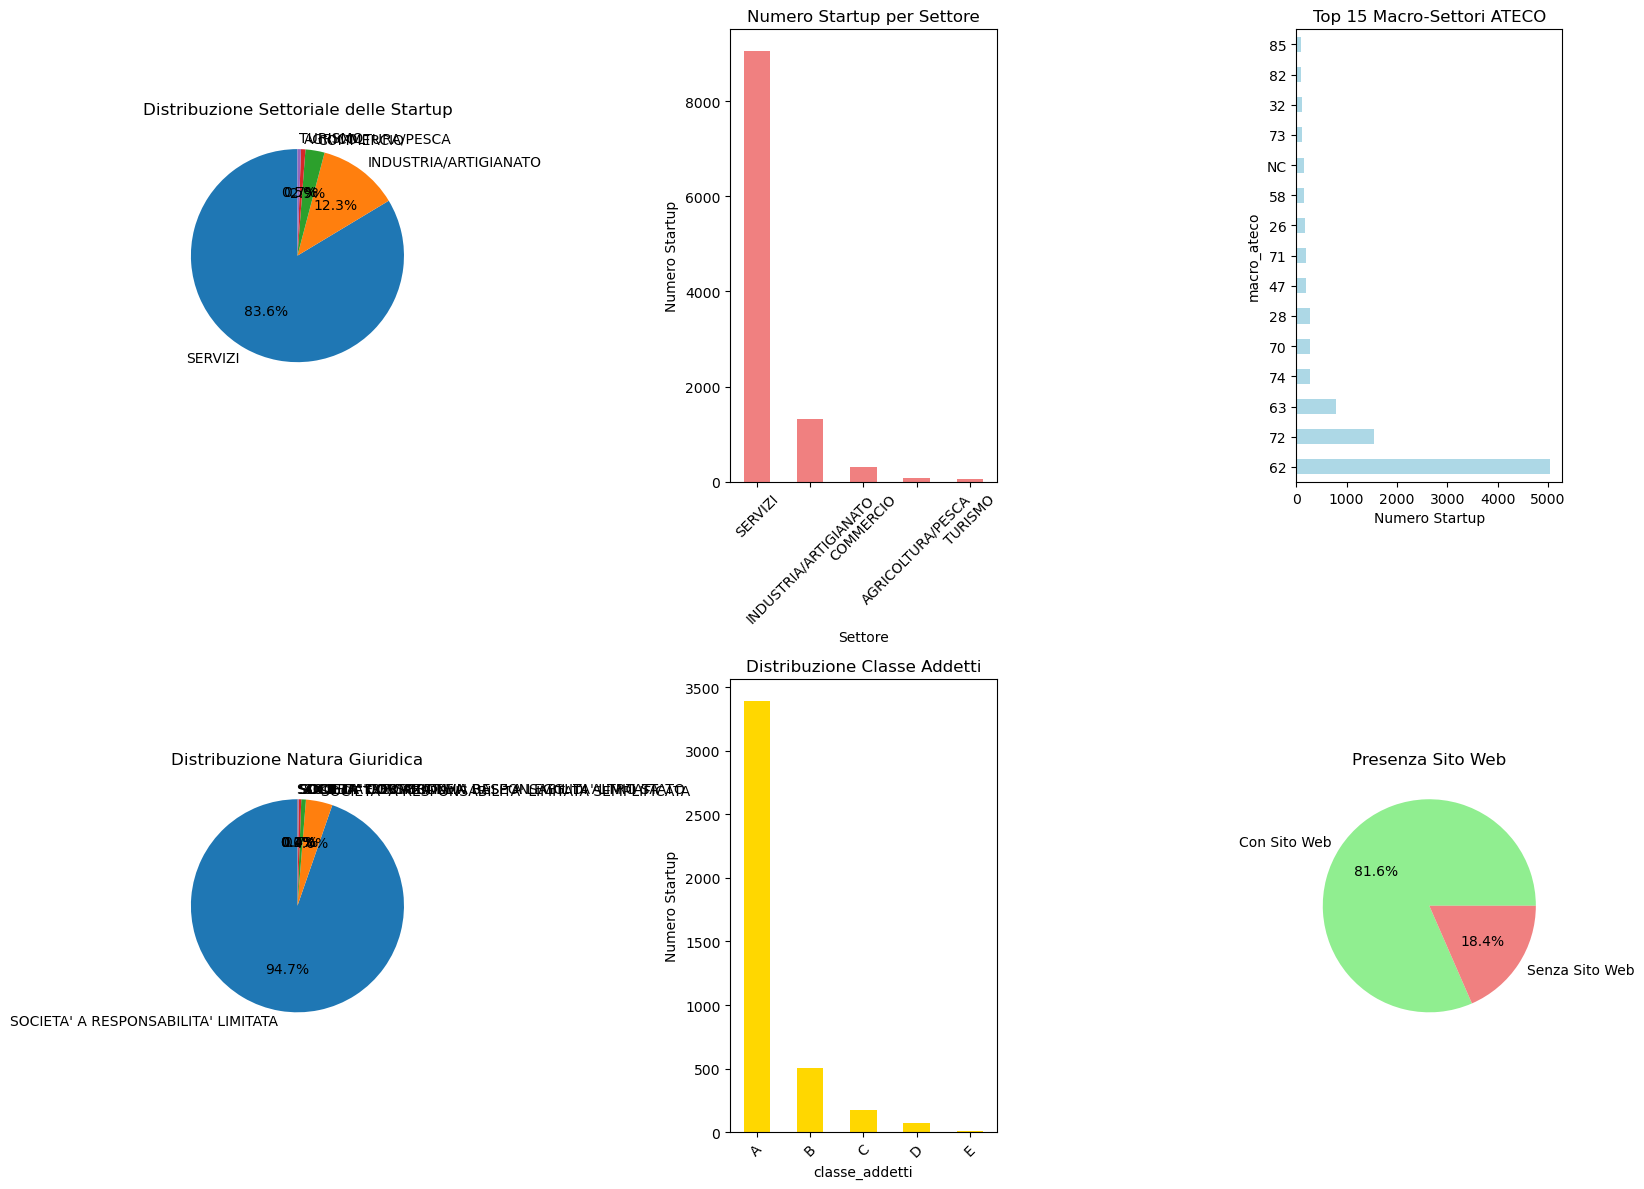


🔄 CROSS-ANALYSIS: SETTORE vs NATURA GIURIDICA
natura_giuridica       SOCIETA' A RESPONSABILITA' LIMITATA  \
settore                                                      
AGRICOLTURA/PESCA                                       69   
COMMERCIO                                              293   
INDUSTRIA/ARTIGIANATO                                 1275   
SERVIZI                                               8560   
TURISMO                                                 53   

natura_giuridica       SOCIETA' A RESPONSABILITA' LIMITATA SEMPLIFICATA  \
settore                                                                   
AGRICOLTURA/PESCA                                                     1   
COMMERCIO                                                            19   
INDUSTRIA/ARTIGIANATO                                                46   
SERVIZI                                                             372   
TURISMO                                                             

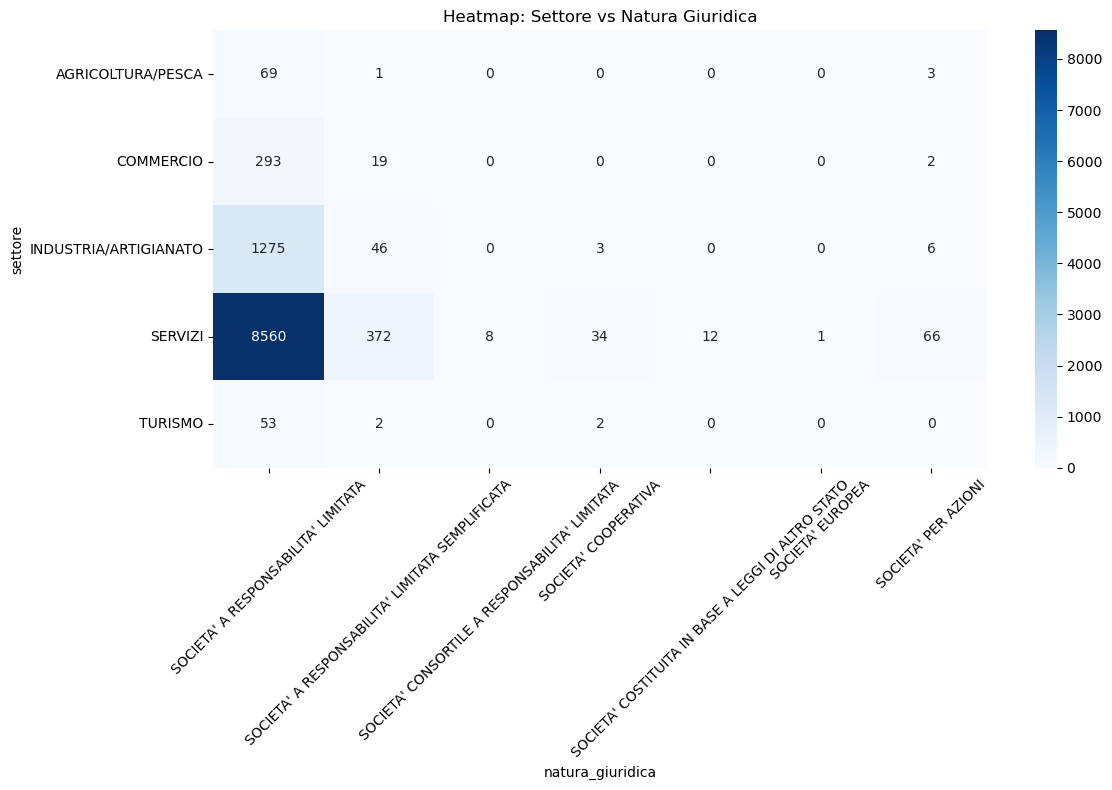

In [13]:
# Analisi Settoriale e Natura Giuridica

df = pd.read_csv('startup_cleaned.csv')

print("=== ANALISI SETTORIALE ===")

# Analisi per settore
if 'settore' in df.columns:
    settori = df['settore'].value_counts()
    print(f"\n🏭 DISTRIBUZIONE PER SETTORE:")
    print(settori)
    
    plt.figure(figsize=(16, 12))
    
    # Grafico a torta per settori
    plt.subplot(2, 3, 1)
    settori.plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title('Distribuzione Settoriale delle Startup')
    plt.ylabel('')
    
    # Grafico a barre per settori
    plt.subplot(2, 3, 2)
    settori.plot(kind='bar', color='lightcoral')
    plt.title('Numero Startup per Settore')
    plt.xlabel('Settore')
    plt.ylabel('Numero Startup')
    plt.xticks(rotation=45)

# Analisi codici ATECO
if 'codice_ateco' in df.columns:
    # Raggruppa per macro-settore ATECO (prime 2 cifre)
    df['macro_ateco'] = df['codice_ateco'].astype(str).str[:2]
    macro_ateco = df['macro_ateco'].value_counts().head(15)
    
    print(f"\n📋 TOP 15 MACRO-SETTORI ATECO:")
    print(macro_ateco)
    
    plt.subplot(2, 3, 3)
    macro_ateco.plot(kind='barh', color='lightblue')
    plt.title('Top 15 Macro-Settori ATECO')
    plt.xlabel('Numero Startup')

# Analisi natura giuridica
print(f"\n=== ANALISI NATURA GIURIDICA ===")
if 'natura_giuridica' in df.columns:
    natura_giur = df['natura_giuridica'].value_counts()
    print(natura_giur)
    
    plt.subplot(2, 3, 4)
    natura_giur.plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title('Distribuzione Natura Giuridica')
    plt.ylabel('')

# Analisi classe addetti
if 'classe_addetti' in df.columns:
    addetti = df['classe_addetti'].value_counts()
    print(f"\n👥 DISTRIBUZIONE CLASSE ADDETTI:")
    print(addetti)
    
    plt.subplot(2, 3, 5)
    addetti.plot(kind='bar', color='gold')
    plt.title('Distribuzione Classe Addetti')
    plt.ylabel('Numero Startup')
    plt.xticks(rotation=45)

# Analisi sito web
if 'sito_web' in df.columns:
    has_website = df['sito_web'].notna().sum()
    no_website = df['sito_web'].isna().sum()
    
    print(f"\n🌐 PRESENZA SITO WEB:")
    print(f"Con sito web: {has_website} ({has_website/len(df)*100:.1f}%)")
    print(f"Senza sito web: {no_website} ({no_website/len(df)*100:.1f}%)")
    
    plt.subplot(2, 3, 6)
    plt.pie([has_website, no_website], 
            labels=['Con Sito Web', 'Senza Sito Web'],
            autopct='%1.1f%%', 
            colors=['lightgreen', 'lightcoral'])
    plt.title('Presenza Sito Web')

plt.tight_layout()
plt.show()

# Cross-analysis: settore vs natura giuridica
if 'settore' in df.columns and 'natura_giuridica' in df.columns:
    crosstab = pd.crosstab(df['settore'], df['natura_giuridica'])
    print(f"\n🔄 CROSS-ANALYSIS: SETTORE vs NATURA GIURIDICA")
    print(crosstab)
    
    # Heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
    plt.title('Heatmap: Settore vs Natura Giuridica')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

=== ANALISI CARATTERISTICHE INNOVATIVE ===

🤝 VOCAZIONE SOCIALE:
vocazione_sociale
no data    12056
SI           236
Name: count, dtype: int64

📋 REQUISITI STARTUP INNOVATIVE:

=== ANALISI DEMOGRAFICA ===

PREVALENZA FEMMINILE:
prevalenza_femminile
NO               10094
Forte              833
no data            532
Esclusiva          503
Maggioritaria      330
Name: count, dtype: int64

PREVALENZA GIOVANILE:
prevalenza_giovanile
NO               9884
Forte             939
Esclusiva         645
no data           518
Maggioritaria     306
Name: count, dtype: int64

PREVALENZA STRANIERA:
prevalenza_straniera
NO               11460
no data            340
Forte              216
Esclusiva          189
Maggioritaria       87
Name: count, dtype: int64

👥 PROFILI DEMOGRAFICI COMBINATI:
profilo_demografico
nessuna_prevalenza    12292
Name: count, dtype: int64

🚀 PUNTEGGIO INNOVAZIONE (0-2):
innovation_score
0    12056
1      236
Name: count, dtype: int64


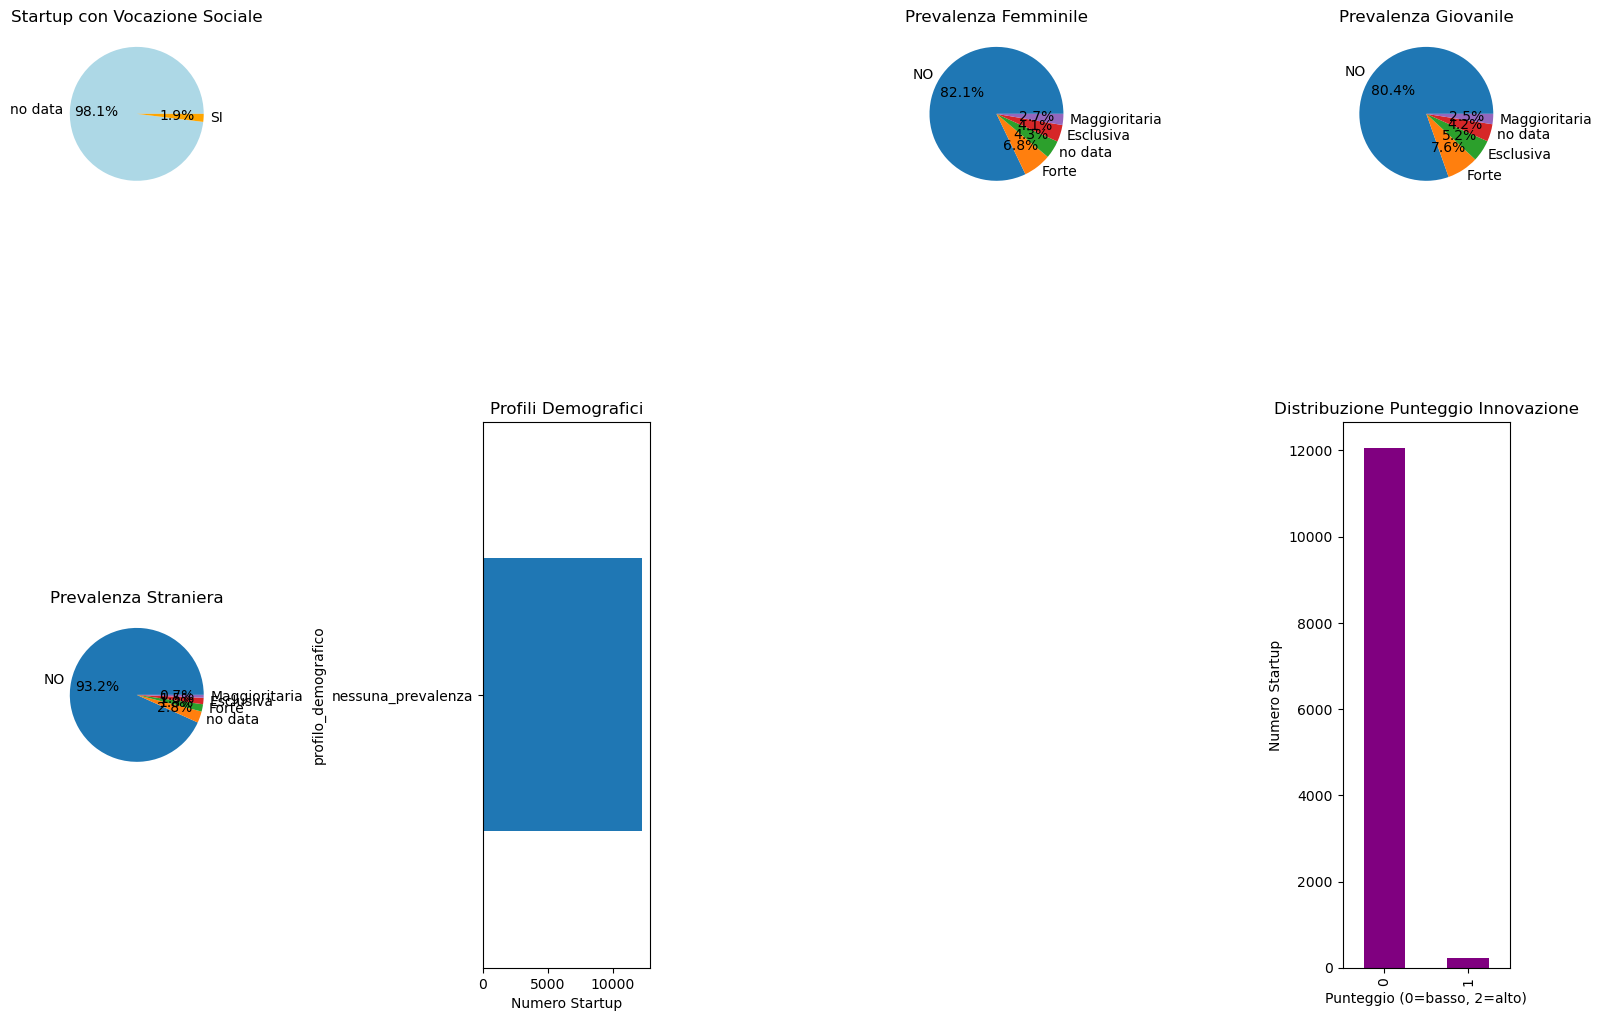


=== CORRELAZIONI INTERESSANTI ===

🏆 TOP 10 PROVINCE PER INNOVAZIONE MEDIA:
provincia
VC    0.20
AG    0.12
OR    0.11
AQ    0.09
AL    0.08
TE    0.08
BZ    0.08
GO    0.08
LC    0.07
PV    0.06
Name: innovation_score, dtype: float64

✅ Dataset con analisi salvato come 'startup_analyzed.csv'


In [13]:
# Analisi Caratteristiche Innovative e Demografia

print("=== ANALISI CARATTERISTICHE INNOVATIVE ===")

# Analisi vocazione sociale
if 'vocazione_sociale' in df.columns:
    voc_sociale = df['vocazione_sociale'].value_counts()
    print(f"\n🤝 VOCAZIONE SOCIALE:")
    print(voc_sociale)
    
    plt.figure(figsize=(16, 12))
    
    plt.subplot(2, 4, 1)
    voc_sociale.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'orange'])
    plt.title('Startup con Vocazione Sociale')
    plt.ylabel('')

# Analisi alta tecnologia energetica
if 'alta_tecnologia_energia' in df.columns:
    alta_tech = df['alta_tecnologia_energia'].value_counts()
    print(f"\n⚡ ALTA TECNOLOGIA ENERGETICA:")
    print(alta_tech)
    
    plt.subplot(2, 4, 2)
    alta_tech.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
    plt.title('Startup Alta Tecnologia Energetica')
    plt.ylabel('')

# Analisi requisiti startup innovative
requisiti_cols = [col for col in df.columns if 'requisito' in col]
print(f"\n📋 REQUISITI STARTUP INNOVATIVE:")

for col in requisiti_cols:
    if col in df.columns:
        req_values = df[col].value_counts()
        print(f"\n{col.upper()}:")
        print(req_values)

# Analisi demografia
print(f"\n=== ANALISI DEMOGRAFICA ===")

demo_cols = ['prevalenza_femminile', 'prevalenza_giovanile', 'prevalenza_straniera']
demo_data = {}

for i, col in enumerate(demo_cols, 3):
    if col in df.columns:
        values = df[col].value_counts()
        demo_data[col] = values
        print(f"\n{col.upper().replace('_', ' ')}:")
        print(values)
        
        plt.subplot(2, 4, i)
        values.plot(kind='pie', autopct='%1.1f%%')
        plt.title(f'{col.replace("_", " ").title()}')
        plt.ylabel('')

# Combinazione caratteristiche demografiche
if all(col in df.columns for col in demo_cols):
    # Crea combinazioni
    df['profilo_demografico'] = df[demo_cols].apply(
        lambda x: '_'.join([col.split('_')[1] for col, val in zip(demo_cols, x) if val == 'SI']), 
        axis=1
    )
    df['profilo_demografico'] = df['profilo_demografico'].replace('', 'nessuna_prevalenza')
    
    profili = df['profilo_demografico'].value_counts()
    print(f"\n👥 PROFILI DEMOGRAFICI COMBINATI:")
    print(profili)
    
    plt.subplot(2, 4, 6)
    profili.head(8).plot(kind='barh')
    plt.title('Profili Demografici')
    plt.xlabel('Numero Startup')

# Analisi classe capitale
if 'classe_capitale' in df.columns:
    capitale = df['classe_capitale'].value_counts()
    print(f"\n💰 CLASSE CAPITALE:")
    print(capitale)
    
    plt.subplot(2, 4, 7)
    capitale.plot(kind='bar', color='gold')
    plt.title('Distribuzione Classe Capitale')
    plt.ylabel('Numero Startup')
    plt.xticks(rotation=45)

# Score innovazione (combinazione di vari fattori)
innovation_factors = []
if 'vocazione_sociale' in df.columns:
    innovation_factors.append((df['vocazione_sociale'] == 'SI').astype(int))
if 'alta_tecnologia_energia' in df.columns:
    innovation_factors.append((df['alta_tecnologia_energia'] == 'SI').astype(int))

if innovation_factors:
    df['innovation_score'] = sum(innovation_factors)
    innovation_dist = df['innovation_score'].value_counts().sort_index()
    
    print(f"\n🚀 PUNTEGGIO INNOVAZIONE (0-2):")
    print(innovation_dist)
    
    plt.subplot(2, 4, 8)
    innovation_dist.plot(kind='bar', color='purple')
    plt.title('Distribuzione Punteggio Innovazione')
    plt.xlabel('Punteggio (0=basso, 2=alto)')
    plt.ylabel('Numero Startup')

plt.tight_layout()
plt.show()

# Analisi correlazioni
print(f"\n=== CORRELAZIONI INTERESSANTI ===")

# Correlazione geografia vs caratteristiche innovative
if 'provincia' in df.columns and 'innovation_score' in df.columns:
    prov_innovation = df.groupby('provincia')['innovation_score'].mean().sort_values(ascending=False).head(10)
    print(f"\n🏆 TOP 10 PROVINCE PER INNOVAZIONE MEDIA:")
    print(prov_innovation.round(2))

# Salva dataset arricchito
df.to_csv('startup_analyzed.csv', index=False)
print(f"\n✅ Dataset con analisi salvato come 'startup_analyzed.csv'")